In [1]:
!pip install networkx
!pip install matplotlib
!pip install pandas

  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)


In [3]:
!pip install tqdm

In [2]:
!pip install colorthief

In [9]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 1.7 MB/s            
  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [1]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os

plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm
from colorthief import ColorThief

warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML(""))

In [3]:
votes_data = pd.read_excel('/home/abishek/Desktop/Projects/Graph_ML/data/Eurovision/ESC2018_GF.xlsx',sheet_name=0)
print(votes_data.shape)
votes_data.head(5)

(26, 47)


,Rank,Running order,Country,Total,Albania,Austria,Belarus,Belgium,Croatia,Cyprus,...,Hungary,Moldova,Armenia,Czech Republic,Georgia,Montenegro,Azerbaijan,San Marino,Italy,Australia
0,1,22,Israel,529,6,19,8,16,16,10,...,16,22,18,22,15,1,13,24,9,18
1,2,25,Cyprus,436,20,1,15,11,8,0,...,7,13,19,8,10,6,14,7,8,7
2,3,5,Austria,342,2,0,10,15,0,2,...,11,3,7,5,9,0,0,0,7,5
3,4,11,Germany,340,14,16,0,7,3,3,...,1,8,5,3,7,0,5,14,13,12
4,5,26,Italy,308,24,10,4,6,10,15,...,6,8,3,2,5,12,5,12,0,0


In [4]:
votes_melted = votes_data.melt(
    ['Rank','Running order','Country','Total'],
    var_name = 'Source Country',value_name='points')

In [18]:
votes_melted = pd.melt(votes_data,id_vars=['Rank','Running order','Country','Total'],
    var_name = 'Source Country',value_name='points')

In [19]:
votes_melted.head(50)

,Rank,Running order,Country,Total,Source Country,points
0,1,22,Israel,529,Albania,6
1,2,25,Cyprus,436,Albania,20
2,3,5,Austria,342,Albania,2
3,4,11,Germany,340,Albania,14
4,5,26,Italy,308,Albania,24
5,6,14,Czech Republic,281,Albania,1
6,7,20,Sweden,274,Albania,4
7,8,6,Estonia,245,Albania,4
8,9,15,Denmark,226,Albania,0
9,10,19,Moldova,209,Albania,2


In [10]:
votes_melted.head(50)

,Rank,Running order,Country,Total,Source Country,points
0,1,22,Israel,529,Albania,6
1,2,25,Cyprus,436,Albania,20
2,3,5,Austria,342,Albania,2
3,4,11,Germany,340,Albania,14
4,5,26,Italy,308,Albania,24
5,6,14,Czech Republic,281,Albania,1
6,7,20,Sweden,274,Albania,4
7,8,6,Estonia,245,Albania,4
8,9,15,Denmark,226,Albania,0
9,10,19,Moldova,209,Albania,2


In [11]:
G = nx.from_pandas_edgelist(votes_melted, 
                            source='Source Country',
                            target='Country',
                            edge_attr='points',
                            create_using=nx.DiGraph())

In [12]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 43
Number of edges: 1118
Average in degree:  26.0000
Average out degree:  26.0000


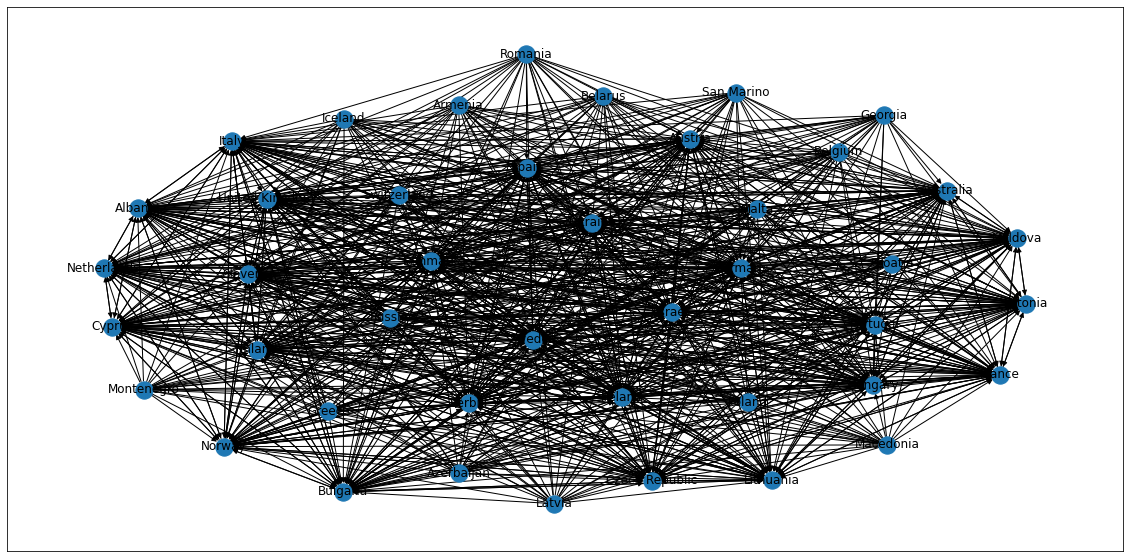

In [13]:
nx.draw_networkx(G)

In [14]:
G.out_degree(weight='points')

OutDegreeView({'Albania': 116, 'Israel': 116, 'Cyprus': 116, 'Austria': 116, 'Germany': 116, 'Italy': 116, 'Czech Republic': 116, 'Sweden': 116, 'Estonia': 116, 'Denmark': 116, 'Moldova': 116, 'Lithuania': 116, 'France': 116, 'Bulgaria': 116, 'Norway': 116, 'Ireland': 116, 'Ukraine': 116, 'Netherlands': 116, 'Serbia': 116, 'Australia': 116, 'Hungary': 116, 'Slovenia': 116, 'Spain': 116, 'United Kingdom': 116, 'Finland': 116, 'Portugal': 116, 'Belarus': 116, 'Belgium': 116, 'Croatia': 116, 'Macedonia': 116, 'Greece': 116, 'Iceland': 116, 'Latvia': 116, 'Malta': 116, 'Poland': 116, 'Romania': 116, 'Russia': 116, 'Switzerland': 116, 'Armenia': 116, 'Georgia': 116, 'Montenegro': 116, 'Azerbaijan': 116, 'San Marino': 116})

In [23]:
Gsub = G.edge_subgraph([(e[0],e[1]) for e in G.edges(data=True) if e[2]['points']>0])

In [20]:
for e in G.edges(data=True):
    print(e)

('Albania', 'Israel', {'points': 6})
('Albania', 'Cyprus', {'points': 20})
('Albania', 'Austria', {'points': 2})
('Albania', 'Germany', {'points': 14})
('Albania', 'Italy', {'points': 24})
('Albania', 'Czech Republic', {'points': 1})
('Albania', 'Sweden', {'points': 4})
('Albania', 'Estonia', {'points': 4})
('Albania', 'Denmark', {'points': 0})
('Albania', 'Moldova', {'points': 2})
('Albania', 'Albania', {'points': 0})
('Albania', 'Lithuania', {'points': 0})
('Albania', 'France', {'points': 12})
('Albania', 'Bulgaria', {'points': 14})
('Albania', 'Norway', {'points': 0})
('Albania', 'Ireland', {'points': 7})
('Albania', 'Ukraine', {'points': 0})
('Albania', 'Netherlands', {'points': 0})
('Albania', 'Serbia', {'points': 3})
('Albania', 'Australia', {'points': 0})
('Albania', 'Hungary', {'points': 0})
('Albania', 'Slovenia', {'points': 0})
('Albania', 'Spain', {'points': 0})
('Albania', 'United Kingdom', {'points': 3})
('Albania', 'Finland', {'points': 0})
('Albania', 'Portugal', {'point

In [24]:
print(nx.info(Gsub))

Name: 
Type: DiGraph
Number of nodes: 43
Number of edges: 650
Average in degree:  15.1163
Average out degree:  15.1163


In [25]:
Gsub.degree()

DiDegreeView({'Albania': 36, 'Israel': 58, 'Cyprus': 58, 'Austria': 50, 'Germany': 54, 'Italy': 50, 'Czech Republic': 54, 'Sweden': 51, 'Estonia': 49, 'Denmark': 48, 'Moldova': 41, 'Lithuania': 37, 'France': 43, 'Bulgaria': 42, 'Norway': 36, 'Ireland': 41, 'Ukraine': 33, 'Netherlands': 37, 'Serbia': 29, 'Australia': 33, 'Hungary': 36, 'Slovenia': 31, 'Spain': 24, 'United Kingdom': 30, 'Finland': 22, 'Portugal': 22, 'Belarus': 16, 'Belgium': 13, 'Croatia': 16, 'Macedonia': 14, 'Greece': 14, 'Iceland': 13, 'Latvia': 18, 'Malta': 14, 'Poland': 17, 'Romania': 17, 'Russia': 14, 'Switzerland': 15, 'Armenia': 14, 'Georgia': 15, 'Montenegro': 16, 'Azerbaijan': 14, 'San Marino': 15})

In [32]:
## number of in degree determines the win

In [31]:
dict(sorted(dict(Gsub.in_degree(weight='points')).items(),key=lambda x:x[1],reverse=True))

{'Israel': 529,
 'Cyprus': 436,
 'Austria': 342,
 'Germany': 340,
 'Italy': 308,
 'Czech Republic': 281,
 'Sweden': 274,
 'Estonia': 245,
 'Denmark': 226,
 'Moldova': 209,
 'Albania': 184,
 'Lithuania': 181,
 'France': 173,
 'Bulgaria': 166,
 'Norway': 144,
 'Ireland': 136,
 'Ukraine': 130,
 'Netherlands': 121,
 'Serbia': 113,
 'Australia': 99,
 'Hungary': 93,
 'Slovenia': 64,
 'Spain': 61,
 'United Kingdom': 48,
 'Finland': 46,
 'Portugal': 39,
 'Belarus': 0,
 'Belgium': 0,
 'Croatia': 0,
 'Macedonia': 0,
 'Greece': 0,
 'Iceland': 0,
 'Latvia': 0,
 'Malta': 0,
 'Poland': 0,
 'Romania': 0,
 'Russia': 0,
 'Switzerland': 0,
 'Armenia': 0,
 'Georgia': 0,
 'Montenegro': 0,
 'Azerbaijan': 0,
 'San Marino': 0}

In [34]:
## Number of countries voted , Cyprus got votes from 42 countries

In [35]:
dict(sorted(dict(Gsub.in_degree()).items(),key=lambda x:x[1],reverse=True))

{'Cyprus': 42,
 'Israel': 41,
 'Germany': 39,
 'Czech Republic': 37,
 'Sweden': 37,
 'Austria': 35,
 'Italy': 35,
 'Estonia': 34,
 'Denmark': 33,
 'Moldova': 28,
 'Bulgaria': 26,
 'Ireland': 25,
 'France': 24,
 'Lithuania': 23,
 'Norway': 23,
 'Albania': 22,
 'Netherlands': 22,
 'Hungary': 21,
 'Ukraine': 18,
 'Australia': 18,
 'Slovenia': 15,
 'Serbia': 13,
 'United Kingdom': 13,
 'Spain': 12,
 'Finland': 8,
 'Portugal': 6,
 'Belarus': 0,
 'Belgium': 0,
 'Croatia': 0,
 'Macedonia': 0,
 'Greece': 0,
 'Iceland': 0,
 'Latvia': 0,
 'Malta': 0,
 'Poland': 0,
 'Romania': 0,
 'Russia': 0,
 'Switzerland': 0,
 'Armenia': 0,
 'Georgia': 0,
 'Montenegro': 0,
 'Azerbaijan': 0,
 'San Marino': 0}

In [37]:
page_rank=dict(nx.pagerank_numpy(G,weight='points'))

In [38]:
page_rank

{'Albania': 0.02669688925417595,
 'Israel': 0.09068710831987273,
 'Cyprus': 0.06401987834138875,
 'Austria': 0.07040510153954498,
 'Germany': 0.06684682907182908,
 'Italy': 0.05195275666905966,
 'Czech Republic': 0.05638836385374529,
 'Sweden': 0.0540213127645027,
 'Estonia': 0.04243922533325635,
 'Denmark': 0.04492611267891653,
 'Moldova': 0.03328330239111792,
 'Lithuania': 0.03499863481613308,
 'France': 0.030008229903378415,
 'Bulgaria': 0.03367684895796855,
 'Norway': 0.026335096424720306,
 'Ireland': 0.035495578711011375,
 'Ukraine': 0.024132379627645865,
 'Netherlands': 0.01927758664490751,
 'Serbia': 0.013907809146369236,
 'Australia': 0.026009410090370187,
 'Hungary': 0.018672520864289468,
 'Slovenia': 0.01486317957156295,
 'Spain': 0.01624412792739784,
 'United Kingdom': 0.01776158056042356,
 'Finland': 0.01749682053915531,
 'Portugal': 0.010150990415860974,
 'Belarus': 0.0034883720930232566,
 'Belgium': 0.0034883720930232566,
 'Croatia': 0.0034883720930232566,
 'Macedonia': 0

In [39]:
dict(sorted(page_rank.items(),key=lambda x:x[1],reverse=True))

{'Israel': 0.09068710831987273,
 'Austria': 0.07040510153954498,
 'Germany': 0.06684682907182908,
 'Cyprus': 0.06401987834138875,
 'Czech Republic': 0.05638836385374529,
 'Sweden': 0.0540213127645027,
 'Italy': 0.05195275666905966,
 'Denmark': 0.04492611267891653,
 'Estonia': 0.04243922533325635,
 'Ireland': 0.035495578711011375,
 'Lithuania': 0.03499863481613308,
 'Bulgaria': 0.03367684895796855,
 'Moldova': 0.03328330239111792,
 'France': 0.030008229903378415,
 'Albania': 0.02669688925417595,
 'Norway': 0.026335096424720306,
 'Australia': 0.026009410090370187,
 'Ukraine': 0.024132379627645865,
 'Netherlands': 0.01927758664490751,
 'Hungary': 0.018672520864289468,
 'United Kingdom': 0.01776158056042356,
 'Finland': 0.01749682053915531,
 'Spain': 0.01624412792739784,
 'Slovenia': 0.01486317957156295,
 'Serbia': 0.013907809146369236,
 'Portugal': 0.010150990415860974,
 'Belarus': 0.0034883720930232566,
 'Belgium': 0.0034883720930232566,
 'Croatia': 0.0034883720930232566,
 'Macedonia': 0

In [40]:
between = dict(nx.betweenness_centrality(G,weight='points'))

In [41]:
between

{'Albania': 1246.9156784992456,
 'Israel': 0.043525121409127246,
 'Cyprus': 0.024390243902439025,
 'Austria': 0.028543072030185093,
 'Germany': 0.03526248708043761,
 'Italy': 206.58139855030535,
 'Czech Republic': 6.361071027542956,
 'Sweden': 43.26701200391492,
 'Estonia': 46701.144689294066,
 'Denmark': 10.014110758588078,
 'Moldova': 1172.9233086163706,
 'Lithuania': 1001.7522816654899,
 'France': 354.86299939154605,
 'Bulgaria': 238.5686301175167,
 'Norway': 621.0998881417889,
 'Ireland': 224.599030463477,
 'Ukraine': 433.8099805670019,
 'Netherlands': 500.23875277853307,
 'Serbia': 695.8629882157195,
 'Australia': 160.62665257476428,
 'Hungary': 132.99696024388462,
 'Slovenia': 218.39832264574116,
 'Spain': 172.45495400993002,
 'United Kingdom': 22.16149108400267,
 'Finland': 37.09440991000119,
 'Portugal': 111.49303067607204,
 'Belarus': 0.0,
 'Belgium': 0.0,
 'Croatia': 0.0,
 'Macedonia': 0.0,
 'Greece': 0.0,
 'Iceland': 0.0,
 'Latvia': 0.0,
 'Malta': 0.0,
 'Poland': 0.0,
 'Roma

In [42]:
dict(sorted(between.items(),key=lambda x:x[1],reverse=True))

{'Estonia': 46701.144689294066,
 'Albania': 1246.9156784992456,
 'Moldova': 1172.9233086163706,
 'Lithuania': 1001.7522816654899,
 'Serbia': 695.8629882157195,
 'Norway': 621.0998881417889,
 'Netherlands': 500.23875277853307,
 'Ukraine': 433.8099805670019,
 'France': 354.86299939154605,
 'Bulgaria': 238.5686301175167,
 'Ireland': 224.599030463477,
 'Slovenia': 218.39832264574116,
 'Italy': 206.58139855030535,
 'Spain': 172.45495400993002,
 'Australia': 160.62665257476428,
 'Hungary': 132.99696024388462,
 'Portugal': 111.49303067607204,
 'Sweden': 43.26701200391492,
 'Finland': 37.09440991000119,
 'United Kingdom': 22.16149108400267,
 'Denmark': 10.014110758588078,
 'Czech Republic': 6.361071027542956,
 'Israel': 0.043525121409127246,
 'Germany': 0.03526248708043761,
 'Austria': 0.028543072030185093,
 'Cyprus': 0.024390243902439025,
 'Belarus': 0.0,
 'Belgium': 0.0,
 'Croatia': 0.0,
 'Macedonia': 0.0,
 'Greece': 0.0,
 'Iceland': 0.0,
 'Latvia': 0.0,
 'Malta': 0.0,
 'Poland': 0.0,
 'Roma